In [1]:
import pandas as pd
import numpy as np
import helper as hp

import matplotlib.pyplot as plt

# Loading data
4 datasets were initially intended to be used. Notes on why the "price" dataset will not be used are later in the notebook.

Download the "All Data" folders for each category in "Bulk Downloads", then place folders in "Data" folder for this notebook.

df_prod:
http://www.fao.org/faostat/en/#data/QC

df_value:
http://www.fao.org/faostat/en/#data/QV

df_trade:
http://www.fao.org/faostat/en/#data/TM

df_price:
http://www.fao.org/faostat/en/#data/PP

In [2]:
df_prod = pd.read_csv("../data/Production_Crops_E_All_Data/Production_Crops_E_All_Data.csv",encoding = 'unicode_escape')

In [3]:
df_value = pd.read_csv("../data/Value_of_Production_E_All_Data/Value_of_Production_E_All_Data.csv",encoding = 'unicode_escape')

In [4]:
df_trade = pd.read_csv('../data/Trade_DetailedTradeMatrix_E_All_Data/Trade_DetailedTradeMatrix_E_All_Data.csv', encoding = "ISO-8859-1")

/Users/ENVasquez/anaconda3/envs/ada/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64,66,68,70,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df_price = pd.read_csv("../data/Prices_E_All_Data/Prices_E_All_Data.csv",encoding = 'unicode_escape')

# Identifying common variables

## Production
### Production (description)
173 products

- Production Quantity and Seed: tonnes; 
- Area harvested: hectares; 
- Yield: tonnes per hectare.


### Value (description)
Value of gross production is provided in both current and constant terms and is expressed in US dollars and Standard Local Currency (SLC). 

The current value of production measures value in the prices relating to the period being measured. Thus, it represents the market value of food and agricultural products at the time they were produced. Knowing this figure is helpful in understanding exactly what was happening within a given economy at that point in time. Often, this information can help explain economic trends that emerged in later periods and why they took place. 

Value of production in constant terms is derived using the average prices of a selected year or years, known as the base period. Constant price series can be used to show how the quantity or volume of products has changed, and are often referred to as volume measures. 

The ratio of the current and constant price series gives a measure of price movements. US dollar figures for value of gross production are converted from local currencies using official exchange rates as prevailing in the respective years. 

The SLC of a country is the local currency prevailing in the latest year. Expressing data series in one uniform currency is useful because it avoids the influence of revaluation in local currency, if any, on value of production. 

- Gross Production Value (constant 2004-2006 1000 International US$) 

- Gross Production Value (constant 2004-2006 million Standard Local Currency)
- Gross Production Value (constant 2004-2006 million US$)

- Gross Production Value (current million Standard Local Currency)
- Gross Production Value (current million US$)

- Net Production Value (constant 2004-2006 1000 International US$)

### Notes:
To obtain production price in 1000 USD/ tonnes, Gross Production Value (constant 2004-2006 1000 International US$) will be used from value, divided by the production tonne from production.


In [6]:
df_prod.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2013,Y2013F,Y2014,Y2014F,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,ha,NaN,NaN,NaN,...,14114.0,NaN,13703.0,NaN,14676.0,NaN,19481.0,NaN,19793.0,NaN
1,2,Afghanistan,221,"Almonds, with shell",5419,Yield,hg/ha,NaN,NaN,NaN,...,29910.0,Fc,19996.0,Fc,16521.0,Fc,16859.0,Fc,13788.0,Fc
2,2,Afghanistan,221,"Almonds, with shell",5510,Production,tonnes,NaN,NaN,NaN,...,42215.0,NaN,27400.0,NaN,24246.0,NaN,32843.0,NaN,27291.0,NaN
3,2,Afghanistan,711,"Anise, badian, fennel, coriander",5312,Area harvested,ha,NaN,M,NaN,...,18500.0,F,30000.0,F,25000.0,F,26019.0,Im,28873.0,Im
4,2,Afghanistan,711,"Anise, badian, fennel, coriander",5419,Yield,hg/ha,NaN,NaN,NaN,...,6757.0,Fc,7167.0,Fc,7200.0,Fc,6923.0,Fc,6830.0,Fc


In [7]:
df_value.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2012,Y2012F,Y2013,Y2013F,Y2014,Y2014F,Y2015,Y2015F,Y2016,Y2016F
0,2,Afghanistan,221,"Almonds, with shell",152,Gross Production Value (constant 2004-2006 100...,1000 Int. $,NaN,NaN,NaN,...,182960.078000,Fc,124575.156335,Fc,80856.550600,Fc,71549.194374,Fc,96918.674867,Fc
1,2,Afghanistan,221,"Almonds, with shell",154,Net Production Value (constant 2004-2006 1000 I$),1000 Int. $,NaN,NaN,NaN,...,182960.078000,Fc,124575.156335,Fc,80856.550600,Fc,71549.194374,Fc,96918.674867,Fc
2,2,Afghanistan,221,"Almonds, with shell",56,Gross Production Value (current million SLC),SLC,NaN,NaN,NaN,...,14911.000000,Fc,9230.459191,Fc,5563.109132,Fc,4824.773367,Fc,6050.024466,Fc
3,2,Afghanistan,221,"Almonds, with shell",55,Gross Production Value (constant 2004-2006 mil...,SLC,NaN,NaN,NaN,...,6460.468889,Fc,4398.849906,Fc,2855.110444,Fc,2526.460140,Fc,3422.277092,Fc
4,2,Afghanistan,711,"Anise, badian, fennel, coriander",152,Gross Production Value (constant 2004-2006 100...,1000 Int. $,NaN,NaN,NaN,...,69090.200000,Fc,69090.200000,Fc,73114.852434,Fc,79457.968291,Fc,77478.699955,Fc


## Trade

### Trade Matrix (description)
Export values are reported as FOB (free on board—that is, the value of the goods plus the value of the services performed to deliver the goods to the border of the exporting country).

Value of agricultural imports: Value of agricultural imports are expressed in thousand US dollars in the FAOSTAT database. Import values are reported as CIF (cost insurance and freight—that is, the value of the goods, plus the value of the services performed to deliver goods to the border of the exporting country, plus the value of the services performed to deliver the good from the border of the exporting country to the border of the importing country).

Quantity of food and agricultural imports: Import quantity represents the physical quantity of the products imported for domestic consumption or processing shipped into a country. It includes re-imports. According to the FAO methodology, the quantity of food and agricultural imports included in the FAOSTAT database is expressed in terms of weight (tonnes) for all commodities except for live animals which are expressed in units (heads); poultry, rabbits, pigeons and other birds are expressed in thousand units.

- Export quantity: Tonnes
- Export value: 1000 USD

### Price Matrix (description)
Producer Prices are prices received by farmers for primary crops, live animals and livestock primary products as collected at the point of initial sale (prices paid at the farm-gate). Due to differences in data collection infrastructure and capacity, some countries do vary from this concept by collecting, instead, wholesale or local market prices. While these may be good proxies of farm-gate prices when the marketing chain is very limited, they tend to be poorer proxies in economies where transport and commercial margins constitute a significant share of the final product price. At the far extreme, some countries report retail prices, which are typically very poor proxies for producer prices.

- Producer Price [Local Currency Unit (LCU)/tonnes] 
- Producer Price [Standard Local Currency (SLC)/tonnes] 
- Producer Price [USD/tonnes]

### Note:
Price Matrix aggregates data per country/item combinations. That is, the price/tonne can not be obtained for individual transactions. For this reason only data from trade matrix will be used and converted in "thousands USD"/tonnes.

In [8]:
df_trade.head()

,Reporter Country Code,Reporter Countries,Partner Country Code,Partner Countries,Item Code,Item,Element Code,Element,Unit,Y1986,...,Y2013,Y2013F,Y2014,Y2014F,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F
0,2,Afghanistan,4,Algeria,230,"Cashew nuts, shelled",5910,Export Quantity,tonnes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,*,NaN,NaN
1,2,Afghanistan,4,Algeria,230,"Cashew nuts, shelled",5922,Export Value,1000 US$,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23.0,*,NaN,NaN
2,2,Afghanistan,4,Algeria,1293,Crude materials,5922,Export Value,1000 US$,NaN,...,NaN,NaN,NaN,NaN,1.0,*,1.0,*,5.0,R
3,2,Afghanistan,4,Algeria,561,Raisins,5910,Export Quantity,tonnes,NaN,...,NaN,NaN,12.0,*,NaN,NaN,NaN,NaN,NaN,NaN
4,2,Afghanistan,4,Algeria,561,Raisins,5922,Export Value,1000 US$,NaN,...,NaN,NaN,27.0,*,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_price.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1991,Y1991F,Y1992,...,Y2014,Y2014F,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F
0,2,Afghanistan,221,"Almonds, with shell",5530,Producer Price (LCU/tonne),LCU,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Afghanistan,221,"Almonds, with shell",5531,Producer Price (SLC/tonne),SLC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Afghanistan,515,Apples,5530,Producer Price (LCU/tonne),LCU,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,Afghanistan,515,Apples,5531,Producer Price (SLC/tonne),SLC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,Afghanistan,526,Apricots,5530,Producer Price (LCU/tonne),LCU,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_prod_o = df_prod.copy()
df_value_o = df_value.copy()
df_trade_o = df_trade.copy()

# Units of Interest
Removing rows that do not have "US int" currency unit from the trade matrix
Two methods to manipulate data were tested, ultimately using "sets" and redefining the dataframe was much faster.


In [11]:
#Separating sets based on Net or Gross unit
US_gross=df_value.Element=="Gross Production Value (constant 2004-2006 1000 I$)"
US_net=df_value.Element=="Net Production Value (constant 2004-2006 1000 I$)"

df_value_g = df_value[US_gross]
df_value_n = df_value[US_net]

df_value = df_value[US_net|US_gross]

In [12]:
print(df_value_g.Element.value_counts(),"\n")
print(df_value_n.Element.value_counts(),"\n")

print(df_value.Element.value_counts())

Gross Production Value (constant 2004-2006 1000 I$)    20346
Name: Element, dtype: int64 

Net Production Value (constant 2004-2006 1000 I$)    20260
Name: Element, dtype: int64 

Gross Production Value (constant 2004-2006 1000 I$)    20346
Net Production Value (constant 2004-2006 1000 I$)      20260
Name: Element, dtype: int64


In [13]:
# %%time
# #Method 1
# #Removing rows that do not have a "Gross Production : Net Production" pair. Using dataframe comparison.
# for row in df_value.iterrows():
#     t_area=df_value["Area"]==row[1]["Area"]
#     t_item=df_value["Item"]==row[1]["Item"]
#     t_elem=df_value["Element"]!=row[1]["Element"]
    
#     if not any(t_area & t_item & t_elem):
#         df_value_m1 = df_value.drop(row[0])

In [14]:
%%time
#Method 2
#Removing rows that do not have a "Gross Production : Net Production" pair. Using sets.

AI_value_ind_g = df_value_g['Area'].astype(str)+df_value_g['Item']
AI_value_g = set(AI_value_ind_g.unique())

AI_value_ind_n = df_value_n['Area'].astype(str)+df_value_n['Item']
AI_value_n = set(AI_value_ind_n.unique())

AI_g = AI_value_g - AI_value_n
AI_n = AI_value_n - AI_value_g

#Verifying uniqueness of set
print(AI_n,"\n\n",AI_g)

set() 

 {'OmanBarley', 'BelarusMaize', 'IsraelBarley', 'KyrgyzstanMillet', 'AmericasCarobs', 'JamaicaMaize', 'NetherlandsCanary seed', 'AzerbaijanLentils', 'Eastern EuropeCarobs', 'JordanMillet', 'GeorgiaPeas, dry', 'UzbekistanOats', 'TajikistanSafflower seed', 'LebanonBarley', 'ArmeniaPeas, dry', 'United Arab EmiratesWheat', 'Belgium-LuxembourgMaize', 'ArmeniaLentils', 'JapanMaize', 'LebanonMaize', 'SwitzerlandMillet', 'MalaysiaMaize', 'ItalyCarobs', 'Central AmericaMillet', 'TajikistanSorghum', 'United Arab EmiratesBarley', 'Western AsiaBuckwheat', 'KyrgyzstanBuckwheat', 'Trinidad and TobagoMaize', 'GuadeloupePotatoes', 'ItalyBarley', 'JapanRye', 'United Arab EmiratesMaize', 'BelarusVetches', 'AlgeriaTriticale', 'TajikistanRye', 'Belgium-LuxembourgOats', 'SwitzerlandOats', 'Western EuropeBuckwheat', 'French GuianaSoybeans', 'LithuaniaOilseeds nes', 'GermanyLentils', 'Northern EuropeRoots and tubers, nes', 'KuwaitMaize', 'MontenegroMaize', 'JordanMaize', 'Western EuropeCanary seed', 

In [15]:
df_value_m2 = df_value.drop(AI_value_ind_g[[AI in AI_g for AI in AI_value_ind_g]].index)
df_value_m2.Element.value_counts()

Gross Production Value (constant 2004-2006 1000 I$)    20260
Net Production Value (constant 2004-2006 1000 I$)      20260
Name: Element, dtype: int64

In [16]:
df_value = df_value_m2
df_value.Element.value_counts()

Gross Production Value (constant 2004-2006 1000 I$)    20260
Net Production Value (constant 2004-2006 1000 I$)      20260
Name: Element, dtype: int64

# Years of interest
Max: 2016. Value matrix goes until 2016.
Min: 1993. From previous analysis, data seems to change after 1993 (see entropy notebook). Perhaps 

In [17]:
df_prod = hp.remove_f_years(df_prod)
df_prod.head()

,Area,Item,Element,Unit,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,...,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016
0,Afghanistan,"Almonds, with shell",Area harvested,ha,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0,...,12000.0,12000.0,11029.0,11210.0,13469.0,13490.0,14114.0,13703.0,14676.0,19481.0
1,Afghanistan,"Almonds, with shell",Yield,hg/ha,16364.0,16364.0,16364.0,16364.0,16364.0,16364.0,...,26234.0,35000.0,39154.0,49955.0,45000.0,45960.0,29910.0,19996.0,16521.0,16859.0
2,Afghanistan,"Almonds, with shell",Production,tonnes,9000.0,9000.0,9000.0,9000.0,9000.0,9000.0,...,31481.0,42000.0,43183.0,56000.0,60611.0,62000.0,42215.0,27400.0,24246.0,32843.0
3,Afghanistan,"Anise, badian, fennel, coriander",Area harvested,ha,2270.0,2871.0,3000.0,7000.0,4000.0,12000.0,...,28000.0,15000.0,17748.0,17000.0,19500.0,18500.0,18500.0,30000.0,25000.0,26019.0
4,Afghanistan,"Anise, badian, fennel, coriander",Yield,hg/ha,6854.0,6761.0,6667.0,6000.0,6250.0,5917.0,...,6071.0,6000.0,6203.0,6000.0,6414.0,6757.0,6757.0,7167.0,7200.0,6923.0


In [18]:
df_value = hp.remove_f_years(df_value)
df_value.head()

,Area,Item,Element,Unit,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,...,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016
0,Afghanistan,"Almonds, with shell",Gross Production Value (constant 2004-2006 100...,1000 Int. $,26558.721000,26558.721000,26558.721000,26558.721000,26558.721000,26558.721000,...,92899.455089,123940.69800,127431.694327,165254.2640,178861.182059,182960.078,124575.156335,80856.550600,71549.194374,96918.674867
1,Afghanistan,"Almonds, with shell",Net Production Value (constant 2004-2006 1000 I$),1000 Int. $,26558.721000,26558.721000,26558.721000,26558.721000,26558.721000,26558.721000,...,92899.455089,123940.69800,127431.694327,165254.2640,178861.182059,182960.078,124575.156335,80856.550600,71549.194374,96918.674867
4,Afghanistan,"Anise, badian, fennel, coriander",Gross Production Value (constant 2004-2006 100...,1000 Int. $,9357.615898,11257.664842,11054.432000,23214.307200,13818.040000,39243.233600,...,93962.672000,49744.94400,57275.009778,56377.6032,64207.463034,69090.200,69090.200000,73114.852434,79457.968291,77478.699955
5,Afghanistan,"Anise, badian, fennel, coriander",Net Production Value (constant 2004-2006 1000 I$),1000 Int. $,9357.615898,11257.664842,11054.432000,23214.307200,13818.040000,39243.233600,...,93962.672000,49744.94400,57275.009778,56377.6032,64207.463034,69090.200,69090.200000,73114.852434,79457.968291,77478.699955
8,Afghanistan,Apples,Gross Production Value (constant 2004-2006 100...,1000 Int. $,7189.538000,7400.995000,7668.541083,8656.305847,9805.373622,11310.032484,...,25163.383000,23040.19434,30773.337210,25311.4029,26238.007474,29603.980,33239.771658,37809.780342,37949.341962,59589.851342


In [19]:
df_trade = hp.remove_f_years(df_trade)
df_trade.head()

,Reporter Countries,Partner Countries,Item,Element,Unit,Y1993,Y1994,Y1995,Y1996,Y1997,...,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016
0,Afghanistan,Algeria,"Cashew nuts, shelled",Export Quantity,tonnes,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,Afghanistan,Algeria,"Cashew nuts, shelled",Export Value,1000 US$,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0
2,Afghanistan,Algeria,Crude materials,Export Value,1000 US$,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,Afghanistan,Algeria,Raisins,Export Quantity,tonnes,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0
4,Afghanistan,Algeria,Raisins,Export Value,1000 US$,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0


# Country list

More countries are present in the country list than number of countries in the world. I noticed that some countries that no longer exist appeared (i.e. "USSR"). These were left in, in case data gaps needed to be explained.

To remove specific countries, they can later be removed from the overlap set.

In [20]:
#From trade matrix
#Identifying if any countries are exclusive to reporter or partner countries
reporter_set = set(df_trade["Reporter Countries"].unique())
partner_set = set(df_trade["Partner Countries"].unique())

print(f" Only in reporter list:\n {reporter_set.difference(partner_set)} \n")
print(f" Only in reporter list:\n {partner_set.difference(reporter_set)} \n")

 Only in reporter list:
 set() 

 Only in reporter list:
 {'Christmas Island', 'Tajikistan', 'Liberia', 'French Southern and Antarctic Territories', 'Palau', 'Czechoslovakia', 'Eritrea', 'Guam', 'Timor-Leste', 'Nauru', 'Cocos (Keeling) Islands', 'Turkmenistan', 'American Samoa', 'Liechtenstein', "Lao People's Democratic Republic", 'Puerto Rico', 'South Sudan', 'British Virgin Islands', 'Palestine', 'Guinea-Bissau', 'United States Virgin Islands', 'Micronesia (Federated States of)', 'Gibraltar', 'Andorra', 'Unspecified Area', 'Somalia', 'Pacific Islands Trust Territory', 'Niue', 'Saint Pierre and Miquelon', 'Equatorial Guinea', 'Iraq', 'Uzbekistan', 'Samoa', 'US Minor Is.', 'Neutral Zone', 'Marshall Islands', 'Anguilla', 'Turks and Caicos Islands', 'South Georgia and the South Sandwich Islands', 'Western Sahara', 'Dominican Republic', 'Falkland Islands (Malvinas)', 'Monaco', 'Chad', 'Sudan', 'Lesotho', 'Wallis and Futuna Islands', 'Mozambique', 'Myanmar', 'Pitcairn Islands', 'Northern M

In [21]:
#There are 195 countries (193 countries in the world)
country_p = set(df_prod.Area.unique())
country_v = set(df_value.Area.unique())
country_t = set(df_trade["Partner Countries"].unique())

country_pv = country_p.intersection(country_v)
country_pt = country_p.intersection(country_t)

country_all = country_pv.intersection(country_pt)

print(f" Prod. country list length:\t {len(country_p)}")
print(f" Value country list length:\t {len(country_v)}")
print(f" PV Joined country list length:\t {len(country_pv)} \n")

print(f" Trade country list length:\t {len(country_t)} \n")
print(f" PT Joined country list length:\t {len(country_pt)} \n")

print(f" All Joined country list length:\t {len(country_all)} \n")

 Prod. country list length:	 258
 Value country list length:	 261
 PV Joined country list length:	 258 

 Trade country list length:	 255 

 PT Joined country list length:	 221 

 All Joined country list length:	 221 



In [22]:
#Verifying no undesired "country" remain in list
country_not = set(["World","Asia","Net Food Importing Developing Countries","Americas",\
                 "Low Income Food Deficit Countries","Africa","Land Locked Developing Countries",\
                 "South America","Eastern Asia","Least Developed Countries","Europe","European Union",\
                 "Central America","Southern Europe","Oceania","China","Western Asia","Southern Asia",\
                 "Eastern Africa","Northern Africa","Eastern Europe","South-Eastern Asia","Northern America",\
                 "Small Island Developing States","Western Europe","Central Asia","Western Africa","Middle Africa",\
                 "Caribbean","Southern Africa"])
print(f" None-countries in country list:\n {country_all.intersection(country_not)} \n")




 None-countries in country list:
 set() 



In [23]:
#Removing countries not found in all sets
df_prod = df_prod[[country in country_all for country in df_prod["Area"]]]

df_value = df_value[[country in country_all for country in df_value["Area"]]]

df_trade = df_trade[[country in country_all for country in df_trade["Partner Countries"]]]
df_trade = df_trade[[country in country_all for country in df_trade["Reporter Countries"]]]

In [24]:
#Notice how value counts for each country is not twice that of production count
df_prod["Area"].value_counts()

China, mainland                                 395
Mexico                                          374
Spain                                           349
Peru                                            331
Turkey                                          322
                                               ... 
Faroe Islands                                     6
United States Virgin Islands                      5
China, Macao SAR                                  3
Liechtenstein                                     2
Saint Helena, Ascension and Tristan da Cunha      2
Name: Area, Length: 221, dtype: int64

In [25]:
df_value["Area"].value_counts()

China, mainland                                 310
Mexico                                          280
Spain                                           272
Turkey                                          264
Peru                                            252
                                               ... 
Western Sahara                                   24
Liechtenstein                                    18
Faroe Islands                                    18
Marshall Islands                                 10
Saint Helena, Ascension and Tristan da Cunha      8
Name: Area, Length: 221, dtype: int64

In [26]:
df_trade["Reporter Countries"].value_counts()

Netherlands                 126501
France                      118396
Germany                     114529
United States of America    112017
United Kingdom              105338
                             ...  
Ethiopia PDR                  2200
Bhutan                        2160
Cook Islands                  1976
Tuvalu                        1556
USSR                           820
Name: Reporter Countries, Length: 180, dtype: int64

In [27]:
df_trade["Partner Countries"].value_counts()

United States of America           124082
France                             115852
Germany                            108912
Netherlands                        107029
United Kingdom                     106097
                                    ...  
United States Virgin Islands         1197
Liechtenstein                         846
Tokelau                               635
Pacific Islands Trust Territory       631
Western Sahara                        177
Name: Partner Countries, Length: 221, dtype: int64

# Adjusting Production to Value 
The production matrix and value matrix do not have data that correspond to eachother. As such, data without its "production:value" pair is removed.

In [28]:
#Example Liechtenstein
df_prod[df_prod["Area"]=="Liechtenstein"]

,Area,Item,Element,Unit,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,...,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016
19562,Liechtenstein,Grapes,Production,tonnes,150.0,158.0,165.0,170.0,175.0,180.0,...,197.0,197.0,197.0,197.0,197.0,195.0,197.0,210.0,212.0,215.0
19563,Liechtenstein,Fruit Primary,Production,tonnes,150.0,158.0,165.0,170.0,175.0,180.0,...,197.0,197.0,197.0,197.0,197.0,195.0,197.0,210.0,212.0,215.0


In [29]:
df_value[df_value["Area"]=="Liechtenstein"]

,Area,Item,Element,Unit,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,...,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016
40640,Liechtenstein,"Eggs, hen, in shell",Gross Production Value (constant 2004-2006 100...,1000 Int. $,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,196.000432,196.399713,196.799809,206.169659,197.602446,201.555394,205.751011,203.888656,202.380104,205.823056
40641,Liechtenstein,"Eggs, hen, in shell",Net Production Value (constant 2004-2006 1000 I$),1000 Int. $,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,196.000432,196.399713,196.799809,206.169659,197.602446,201.555394,205.751011,203.888656,202.380104,205.823056
40642,Liechtenstein,Grapes,Gross Production Value (constant 2004-2006 100...,1000 Int. $,85.742550,90.329667,94.070460,97.358152,100.218390,102.681934,...,112.494755,112.673852,112.777793,112.821377,112.818232,111.465315,112.810997,120.023098,121.157882,122.861628
40643,Liechtenstein,Grapes,Net Production Value (constant 2004-2006 1000 I$),1000 Int. $,85.742550,90.329667,94.070460,97.358152,100.218390,102.681934,...,112.494755,112.673852,112.777793,112.821377,112.818232,111.465315,112.810997,120.023098,121.157882,122.861628
40644,Liechtenstein,"Milk, whole fresh cow",Gross Production Value (constant 2004-2006 100...,1000 Int. $,3898.890134,3934.777149,3972.224469,4052.424146,4067.091013,4147.914812,...,4099.545357,4181.929461,4152.907788,4210.639073,4369.790183,4316.427752,4173.191753,4266.185931,4162.893740,4039.941706
40645,Liechtenstein,"Milk, whole fresh cow",Net Production Value (constant 2004-2006 1000 I$),1000 Int. $,3898.890134,3934.777149,3972.224469,4052.424146,4067.091013,4147.914812,...,4099.545357,4181.929461,4152.907788,4210.639073,4369.790183,4316.427752,4173.191753,4266.185931,4162.893740,4039.941706
40646,Liechtenstein,"Milk,Total",Gross Production Value (constant 2004-2006 100...,1000 Int. $,3899.000000,3935.000000,3972.000000,4052.000000,4067.000000,4148.000000,...,4100.000000,4182.000000,4153.000000,4211.000000,4370.000000,4316.000000,4173.000000,4266.000000,4163.000000,4040.000000
40647,Liechtenstein,"Milk,Total",Net Production Value (constant 2004-2006 1000 I$),1000 Int. $,3899.000000,3935.000000,3972.000000,4052.000000,4067.000000,4148.000000,...,4100.000000,4182.000000,4153.000000,4211.000000,4370.000000,4316.000000,4173.000000,4266.000000,4163.000000,4040.000000
40648,Liechtenstein,Vegetables and Fruit Primary,Gross Production Value (constant 2004-2006 100...,1000 Int. $,86.000000,90.000000,94.000000,97.000000,100.000000,103.000000,...,112.000000,113.000000,113.000000,113.000000,113.000000,111.000000,113.000000,120.000000,121.000000,123.000000
40649,Liechtenstein,Vegetables and Fruit Primary,Net Production Value (constant 2004-2006 1000 I$),1000 Int. $,86.000000,90.000000,94.000000,97.000000,100.000000,103.000000,...,112.000000,113.000000,113.000000,113.000000,113.000000,111.000000,113.000000,120.000000,121.000000,123.000000


In [30]:
AI_prod_ind = df_prod['Area'].astype(str)+df_prod['Item']
AI_prod = set(AI_prod_ind.unique())

AI_value_ind = df_value['Area'].astype(str)+df_value['Item']
AI_value = set(AI_value_ind.unique())

AI_all = AI_prod.intersection(AI_value)

print(f"Prod Area/Item pair length:\t {len(AI_prod)}")
print(f"Value Area/Item pair length:\t {len(AI_value)}")
print(f"Area/Item intersect length:\t {len(AI_all)}")

Prod Area/Item pair length:	 12515
Value Area/Item pair length:	 15032
Area/Item intersect length:	 10558


In [31]:
df_prod = df_prod[[AI in AI_all for AI in AI_prod_ind]]
df_value = df_value[[AI in AI_all for AI in AI_value_ind]]

In [32]:
df_value.Area.value_counts()

China, mainland                                 244
Mexico                                          230
Spain                                           212
Peru                                            206
Turkey                                          202
                                               ... 
Faroe Islands                                     4
Western Sahara                                    4
Saint Helena, Ascension and Tristan da Cunha      2
China, Macao SAR                                  2
Liechtenstein                                     2
Name: Area, Length: 221, dtype: int64

In [33]:
#Example Liechtenstein
df_prod[df_prod["Area"]=="Liechtenstein"]

,Area,Item,Element,Unit,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,...,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016
19562,Liechtenstein,Grapes,Production,tonnes,150.0,158.0,165.0,170.0,175.0,180.0,...,197.0,197.0,197.0,197.0,197.0,195.0,197.0,210.0,212.0,215.0


In [34]:
df_value[df_value["Area"]=="Liechtenstein"]

,Area,Item,Element,Unit,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,...,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016
40642,Liechtenstein,Grapes,Gross Production Value (constant 2004-2006 100...,1000 Int. $,85.74255,90.329667,94.07046,97.358152,100.21839,102.681934,...,112.494755,112.673852,112.777793,112.821377,112.818232,111.465315,112.810997,120.023098,121.157882,122.861628
40643,Liechtenstein,Grapes,Net Production Value (constant 2004-2006 1000 I$),1000 Int. $,85.74255,90.329667,94.07046,97.358152,100.21839,102.681934,...,112.494755,112.673852,112.777793,112.821377,112.818232,111.465315,112.810997,120.023098,121.157882,122.861628


# Item list

In [35]:
item_p = set(df_prod.Item.unique())
item_v = set(df_value.Item.unique())
item_t = set(df_trade.Item.unique())
item_pt = item_p.intersection(item_t)
item_all = item_pt.intersection(item_v)

print(f" Production item list length:\n {len(item_p)}")
print(f" Value item list length:\n {len(item_v)}")
print(f" Trade item list length:\n {len(item_t)} \n")
print(f" PT Joined list length:\n {len(item_pt)} \n")
print(f" All item list length:\n {len(item_all)} \n")

 Production item list length:
 161
 Value item list length:
 161
 Trade item list length:
 424 

 PT Joined list length:
 120 

 All item list length:
 120 



In [36]:
df_prod = df_prod[[item in item_all for item in df_prod["Item"]]]
df_value = df_value[[item in item_all for item in df_value["Item"]]]
df_trade = df_trade[[item in item_all for item in df_trade["Item"]]]

# Verifying final results

In [37]:
print(df_prod_o.shape,df_prod.shape)

(49370, 121) (23942, 28)


In [38]:
print(df_value_o.shape,df_value.shape)

(95799, 119) (16622, 28)


In [39]:
print(df_trade_o.shape,df_trade.shape)

(5248354, 73) (1347352, 29)


# Production value:cost per tonne matrix
Creating a matrix containing production value and cost in 1000 US$ per tonne.



In [40]:
df_prod_t = df_prod[df_prod["Element"]=="Production"]
df_prod_t.reset_index(drop=True,inplace=True)
df_prod_t.shape

(8311, 28)

In [41]:
df_value_g = df_value[df_value["Element"]=="Gross Production Value (constant 2004-2006 1000 I$)"]
df_value_g.reset_index(drop=True,inplace=True)
print("gross value matrix:",df_value_g.shape)

df_value_n = df_value[df_value["Element"]=="Net Production Value (constant 2004-2006 1000 I$)"]
df_value_n.reset_index(drop=True,inplace=True)
print("net value matrix:",df_value_n.shape)

gross value matrix: (8311, 28)
net value matrix: (8311, 28)


## Creating cost/tonne matrix
Note that for many items, the net and gross production value are equal. As such, only gross production value will be used, and it will be assumed to be the gross production value.

In [42]:
#Verifying if dataframes are ordered equally
print("Area do not match:", any(df_value_g["Area"]!=df_value_n["Area"]))
print("Item do not match:", any(df_value_g["Item"]!=df_value_n["Item"]))

Area do not match: False
Item do not match: False


In [43]:
#Creating cost matrix by subtracting net production value from gross production value
df_cost_numbers = df_value_g.loc[:,"Y1993":"Y2016"].subtract(df_value_n.loc[:,"Y1993":"Y2016"])

df_cost_data = df_value_g.loc[:,:"Unit"]
df_cost_data["Unit"]="1000 US$"
df_cost_data["Element"]="Gross Production Value minus Net Production Value"

df_cost = pd.concat([df_cost_data, df_cost_numbers], axis=1, sort=False)
df_cost.head()

,Area,Item,Element,Unit,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,...,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016
0,Afghanistan,"Almonds, with shell",Gross Production Value minus Net Production Value,1000 US$,0.00,0.000,0.00000,0.00,0.000,0.0000,...,0.00000,0.00000,0.00000,0.0000,0.0000,0.00000,0.00000,0.00000,0.00000,0.000000
1,Afghanistan,"Anise, badian, fennel, coriander",Gross Production Value minus Net Production Value,1000 US$,0.00,0.000,0.00000,0.00,0.000,0.0000,...,0.00000,0.00000,0.00000,0.0000,0.0000,0.00000,0.00000,0.00000,0.00000,0.000000
2,Afghanistan,Apples,Gross Production Value minus Net Production Value,1000 US$,0.00,0.000,0.00000,0.00,0.000,0.0000,...,0.00000,0.00000,0.00000,0.0000,0.0000,0.00000,0.00000,0.00000,0.00000,0.000000
3,Afghanistan,Apricots,Gross Production Value minus Net Production Value,1000 US$,0.00,0.000,0.00000,0.00,0.000,0.0000,...,0.00000,0.00000,0.00000,0.0000,0.0000,0.00000,0.00000,0.00000,0.00000,0.000000
4,Afghanistan,Barley,Gross Production Value minus Net Production Value,1000 US$,8328.74,7614.848,6943.78952,7138.92,7852.812,7424.4768,...,34381.03872,30860.36134,47868.83824,39966.0538,27817.9916,46312.55368,46093.36028,46093.36028,46093.36028,35915.430592


## Creating value/tonne matrix

Note: The original production matrics shows tonnes/hectar in hg (hectogram) per hectare. This is 1000 time ton/hectare since 1 tonne is 1000 hg.

Note on the graph that when plotted many of these values are constant, this could be because one was obtained from the other. What is weird is that if they did for example extrapolate value form production, you would expect these prices to sill change depending on the international market value.

In [44]:
#Verifying if dataframes are ordered equally
print("Area do not match:", any(df_value_g["Area"]!=df_prod_t["Area"]))
print("Item do not match:", any(df_value_g["Item"]!=df_prod_t["Item"]))

Area do not match: False
Item do not match: False


In [45]:
#Creating value per tonne matrix by dividing
df_valpt_numbers = df_value_g.loc[:,"Y1993":"Y2016"].divide(df_prod_t.loc[:,"Y1993":"Y2016"])
df_valpt_numbers[df_valpt_numbers == np.Inf] = np.NaN

df_valpt_data = df_value_g.loc[:,:"Unit"]
df_valpt_data["Unit"]="1000 US$/tonne"
df_valpt_data["Element"]="Gross Production Value per tonne"

df_valpt = pd.concat([df_valpt_data, df_valpt_numbers], axis=1, sort=False)
df_valpt.head()

,Area,Item,Element,Unit,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,...,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016
0,Afghanistan,"Almonds, with shell",Gross Production Value per tonne,1000 US$/tonne,2.950969,2.950969,2.950969,2.950969,2.950969,2.950969,...,2.950969,2.950969,2.950969,2.950969,2.950969,2.950969,2.950969,2.950969,2.950969,2.950969
1,Afghanistan,"Anise, badian, fennel, coriander",Gross Production Value per tonne,1000 US$/tonne,6.013892,5.799930,5.527216,5.527216,5.527216,5.527216,...,5.527216,5.527216,5.203035,5.527216,5.133312,5.527216,5.527216,3.400691,4.414332,4.301505
2,Afghanistan,Apples,Gross Production Value per tonne,1000 US$/tonne,0.422914,0.422914,0.389880,0.370863,0.353640,0.349226,...,0.422914,0.410984,0.422914,0.422914,0.422914,0.422914,0.422914,0.422914,0.422914,0.422914
3,Afghanistan,Apricots,Gross Production Value per tonne,1000 US$/tonne,0.552107,0.556838,0.552107,0.547153,0.539971,0.532691,...,0.552107,0.552849,0.552107,0.552107,0.551231,0.552107,0.552107,0.552107,0.552107,0.552107
4,Afghanistan,Barley,Gross Production Value per tonne,1000 US$/tonne,0.118982,0.118982,0.118982,0.118982,0.118982,0.118982,...,0.118982,0.118982,0.118982,0.118982,0.118982,0.118982,0.118982,0.118982,0.118982,0.118982


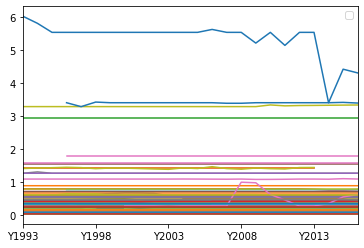

In [46]:
df_valpt.loc[:,"Y1993":"Y2016"].transpose().iloc[:,range(1,100)].plot()
plt.legend([])

# Creating trade cost/tonne matrix

Note as is right now these matrices don't differentiate between country exported nothing (v/q = 0/0) or country exported without profit (v/q = 0/1).

When either data is not available (v/q = nan/# or #/nan), it is stored as NaN

In [47]:
df_trade.Element.value_counts()

Import Value       364214
Import Quantity    364214
Export Quantity    309462
Export Value       309462
Name: Element, dtype: int64

In [48]:
df_imp_q = df_trade[df_trade["Element"]=="Import Quantity"]
df_imp_v = df_trade[df_trade["Element"]=="Import Value"]
df_exp_q = df_trade[df_trade["Element"]=="Import Quantity"]
df_exp_v = df_trade[df_trade["Element"]=="Import Value"]

df_imp_q.reset_index(drop=True,inplace=True)
df_imp_v.reset_index(drop=True,inplace=True)
df_exp_q.reset_index(drop=True,inplace=True)
df_exp_v.reset_index(drop=True,inplace=True)


In [49]:
#Verifying if dataframes are ordered equally
print("\n Import ")
print("Reporter Countries do not match:", any(df_imp_q["Reporter Countries"]!=df_imp_v["Reporter Countries"]))
print("Partner Countries do not match:", any(df_imp_q["Partner Countries"]!=df_imp_v["Partner Countries"]))
print("Item do not match:", any(df_imp_q["Item"]!=df_imp_v["Item"]))
print("\n Export")
print("Reporter Countries do not match:", any(df_exp_q["Reporter Countries"]!=df_exp_v["Reporter Countries"]))
print("Partner Countries do not match:", any(df_exp_q["Partner Countries"]!=df_exp_v["Partner Countries"]))
print("Item do not match:", any(df_exp_q["Item"]!=df_exp_v["Item"]))


 Import 
Reporter Countries do not match: False
Partner Countries do not match: False
Item do not match: False

 Export
Reporter Countries do not match: False
Partner Countries do not match: False
Item do not match: False


In [50]:
df_imp_numbers = df_imp_v.loc[:,"Y1993":"Y2016"].divide(df_imp_q.loc[:,"Y1993":"Y2016"])
df_imp_numbers[df_imp_q.loc[:,"Y1993":"Y2016"] == 0] = 0
df_imp_numbers[df_imp_v.loc[:,"Y1993":"Y2016"] == np.NaN] = np.NaN
df_imp_numbers[df_imp_q.loc[:,"Y1993":"Y2016"] == np.NaN] = np.NaN

df_exp_numbers = df_exp_v.loc[:,"Y1993":"Y2016"].divide(df_exp_q.loc[:,"Y1993":"Y2016"])
df_exp_numbers[df_exp_q.loc[:,"Y1993":"Y2016"] == 0] = 0
df_exp_numbers[df_exp_v.loc[:,"Y1993":"Y2016"] == np.NaN] = np.NaN
df_exp_numbers[df_exp_q.loc[:,"Y1993":"Y2016"] == np.NaN] = np.NaN


df_imp_data = df_imp_v.loc[:,:"Unit"]
df_imp_data["Unit"]="1000 US$/tonne"
df_imp_data["Element"]="Import value/quantity"

df_exp_data = df_exp_v.loc[:,:"Unit"]
df_exp_data["Unit"]="1000 US$/tonne"
df_exp_data["Element"]="Export value/quantity"

df_imp = pd.concat([df_imp_data, df_imp_numbers], axis=1, sort=False)
df_exp = pd.concat([df_exp_data, df_exp_numbers], axis=1, sort=False)

In [51]:
#Verify if any NaN or inf
print("\n\n Inf in imp \ exp:\n",\
      df_imp_numbers[df_imp_numbers == np.Inf].any().any(),\
      df_exp_numbers[df_exp_numbers == np.Inf].any().any(),\
      "\n\n NaN in imp \ exp:\n",\
      df_imp_numbers[df_imp_numbers == np.NaN].any().any(),\
      df_exp_numbers[df_exp_numbers == np.NaN].any().any())



 Inf in imp \ exp:
 False False 

 NaN in imp \ exp:
 False False


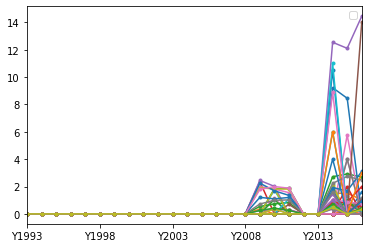

In [52]:
df_imp.loc[:,"Y1993":"Y2016"].transpose().iloc[:,range(1,100)].plot(style='.-')
plt.legend([])

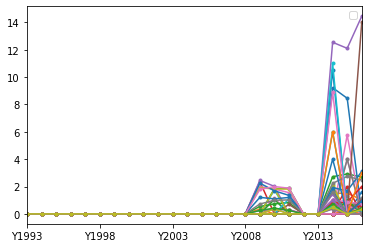

In [53]:
df_exp.loc[:,"Y1993":"Y2016"].transpose().iloc[:,range(1,100)].plot(style='.-')
plt.legend([])

# Pickling

In [54]:
df_prod.to_pickle("../data/df_prod.pkl")

In [55]:
df_value.to_pickle("../data/df_value.pkl")

In [56]:
df_trade.to_pickle("../data/df_trade.pkl")

In [57]:
df_valpt.to_pickle("../data/df_valpt.pkl")

In [58]:
df_imp.to_pickle("../data/df_imp.pkl")

In [59]:
df_exp.to_pickle("../data/df_exp.pkl")